In [2]:
import pandas as pd
import json
import numpy as np
from collections import Counter
import nltk
import matplotlib.pyplot as plt
import pickle

In [3]:
df = pd.read_csv("aita_clean.csv")

In [4]:
df

,id,timestamp,title,body,edited,verdict,score,num_comments,is_asshole
0,1ytxov,1.393279e+09,[AITA] I wrote an explanation in TIL and came ...,[Here is the post in question](http://www.redd...,False,asshole,52,13.0,1
1,1yu29c,1.393281e+09,[AITA] Threw my parent's donuts away,"My parents are diabetic, morbidly obese, and a...",1393290576.0,asshole,140,27.0,1
2,1yu8hi,1.393285e+09,I told a goth girl she looked like a clown.,I was four.,False,not the asshole,74,15.0,0
3,1yuc78,1.393287e+09,[AItA]: Argument I had with another redditor i...,http://www.reddit.com/r/HIMYM/comments/1vvfkq/...,1393286962.0,everyone sucks,22,3.0,1
4,1yueqb,1.393288e+09,[AITA] I let my story get a little long and bo...,NaN,False,not the asshole,6,4.0,0
...,...,...,...,...,...,...,...,...,...
97623,ex94w5,1.580577e+09,AITA for telling my sister she is being a spoi...,My sister(17F) and I(15M) are white kids born ...,1580585457.0,not the asshole,16,23.0,0
97624,ex970f,1.580577e+09,AITA for telling my husband to f* off after he...,My husband (28M) and I (32F) are married for a...,1580584475.0,not the asshole,1373,304.0,0
97625,ex9dwo,1.580578e+09,AITA for attempting to keep my students out of...,Upfront apologies for formatting. I’m also try...,False,not the asshole,4,15.0,0
97626,ex9egs,1.580578e+09,WIBTA if I left my brothers fate up to the state?,A little back story my mom is a drug addict an...,False,not the asshole,280,140.0,0


In [12]:
labels = []
raw_titles = []
for index, row in df.iterrows():
    labels.append(row["is_asshole"])
    raw_titles.append(row["title"])

------------------------------
[Here is the post in question](http://www.reddit.com/r/todayilearned/comments/1y40m9/til_a_circle_of_infinite_circumference_is_a/cfhhajs?context=3)

It seems like I came off as an asshole. What can I do in the future to avoid this? I thought I was just randomly explaining something, which seems common on Reddit.

I definitely shouldn't have said "Sorry for trying to help" - That was pretty immature and rude. 

Am I the asshole here?

I wrote as little as possible to skew perspective as little as possible.
[AITA] I wrote an explanation in TIL and came off as condescending
------------------------------
My parents are diabetic, morbidly obese, and addicted to food. 

I'm the same, minus the diabetes. I've been trying for a while to eat healthily and lose weight. So have they, but yet every time they go to the store, they bring home junk food. 

I understand that it's hard for them, but it's also hard to stay on track with my healthier lifestyle when there's

TypeError: must be str, not float

In [6]:
words = Counter()
tokenized_titles = []
num_train = len(raw_titles)
for index, title in enumerate(raw_titles):
    tokenized_titles.append([])
    title = ''.join(ch for ch in title if ch.isalnum() or ch == " ")
    tokenized_titles[-1].append("_SOS")
    words.update(["_SOS"])
    for word in nltk.word_tokenize(title):
        words.update([word.lower()])
        tokenized_titles[-1].append(word.lower())
    tokenized_titles[-1].append("_EOS")
    words.update(["_EOS"])
    if index % 20000 == 0:
        print(str((index * 100)/num_train) + "% done")
print("Done")

0.0% done


TypeError: 'float' object is not iterable

In [47]:
words_filtered = {k:v for k,v in words.items() if v > 1}
vocabulary = sorted(words_filtered, key=words_filtered.get, reverse=True)
vocabulary = ['_PAD','_UNK'] + vocabulary
word2idx = {w:i for i,w in enumerate(vocabulary)}
idx2word = {i:w for w,i in enumerate(vocabulary)}
print(len(vocabulary))
vocabulary

11657


['_PAD',
 '_UNK',
 '_SOS',
 '_EOS',
 'for',
 'aita',
 'my',
 'to',
 'a',
 'i',
 'not',
 'the',
 'wibta',
 'if',
 'with',
 'of',
 'friend',
 'wanting',
 'in',
 'and',
 'me',
 'on',
 'at',
 'her',
 'telling',
 'that',
 'out',
 'being',
 'about',
 'friends',
 'his',
 'she',
 'because',
 'when',
 'getting',
 'after',
 'an',
 'up',
 'girlfriend',
 'asking',
 'from',
 'he',
 'family',
 'boyfriend',
 'is',
 'mom',
 'our',
 'sister',
 'was',
 'refusing',
 'be',
 'go',
 'who',
 'dont',
 'parents',
 'it',
 'someone',
 'off',
 'wedding',
 'brother',
 'get',
 'over',
 'going',
 'wife',
 'dad',
 'told',
 'work',
 'ex',
 'calling',
 'upset',
 'back',
 'letting',
 'best',
 'making',
 'him',
 'house',
 'pay',
 'didnt',
 'have',
 'birthday',
 'mother',
 'mad',
 'giving',
 'gf',
 'want',
 'im',
 'their',
 'dog',
 'they',
 'girl',
 'husband',
 'money',
 'stop',
 'taking',
 'roommate',
 'so',
 'party',
 'this',
 'as',
 'while',
 'new',
 'job',
 'leaving',
 'coworker',
 'time',
 'guy',
 'kids',
 'home',
 '

In [48]:
idx_titles = list(map(lambda x: [word2idx[w] if w in word2idx else 1 for w in x], tokenized_titles))
idx_titles

[[2, 5, 9, 1653, 36, 2767, 18, 5986, 19, 720, 57, 98, 4027, 3],
 [2, 5, 883, 6, 54, 3513, 126, 3],
 [2, 9, 65, 8, 8901, 89, 31, 1577, 141, 8, 5987, 3],
 [2, 5, 587, 9, 156, 14, 182, 5451, 18, 1, 3],
 [2,
  5,
  9,
  168,
  6,
  878,
  60,
  8,
  240,
  311,
  19,
  4233,
  19,
  11,
  210,
  9,
  48,
  147,
  7,
  168,
  26,
  8,
  661,
  1,
  3],
 [2, 5, 156, 8, 3365, 28, 1, 1, 14, 8, 103, 3],
 [2, 8902, 9, 3366, 131, 8, 452, 5452, 3],
 [2,
  5,
  6,
  94,
  142,
  1176,
  8903,
  8904,
  153,
  9,
  1108,
  50,
  147,
  28,
  74,
  220,
  251,
  3],
 [2, 5, 3367, 2398, 3],
 [2, 5, 318, 7, 318, 2109, 210, 3],
 [2, 5, 269, 6, 16, 196, 4752, 110, 4, 196, 835, 3],
 [2, 5, 766, 6, 1, 58, 7, 50, 14, 6, 45, 188, 23, 4028, 3],
 [2, 147, 28, 4234, 1, 18, 1, 3],
 [2, 587, 14, 8, 16, 1924, 490, 1033, 1108, 50, 311, 3],
 [2, 5, 371, 22, 6, 54, 75, 3],
 [2,
  48,
  8905,
  97,
  1531,
  308,
  8,
  149,
  508,
  20,
  19,
  8,
  16,
  15,
  862,
  176,
  480,
  27,
  29,
  61,
  97,
  55,
  5988,

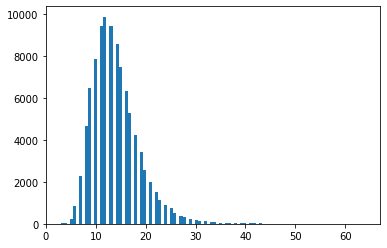

In [49]:
l = list(map(lambda x: len(x), idx_titles))
fig, ax = plt.subplots()
n, bins, patches = ax.hist(l, 100)
plt.show()

In [50]:
def pad_data(titles, sequence_length):
    ret = np.zeros((len(titles), sequence_length))
    for index, title in enumerate(titles):
        ret[index, -len(title):] = np.array(title)[:sequence_length]
    return ret

In [51]:
processed_titles = pad_data(idx_titles, 30)
processed_titles

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 9.800e+01, 4.027e+03,
        3.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 3.513e+03, 1.260e+02,
        3.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 8.000e+00, 5.987e+03,
        3.000e+00],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 7.340e+02, 6.273e+03,
        3.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.100e+01, 9.290e+02,
        3.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 6.490e+02, 2.000e+01,
        3.000e+00]])

In [52]:
processed_labels = np.array(labels)
processed_labels

array([1, 1, 0, ..., 0, 0, 0])

In [53]:
assert len(processed_titles) == len(processed_labels)

In [54]:
save_dict = {"titles": processed_titles,
             "labels": processed_labels,
             "vocabulary": vocabulary,
             "word2idx": word2idx,
             "idx2word": idx2word,
             "word_counts": words_filtered}
save_dict

{'titles': array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 9.800e+01, 4.027e+03,
         3.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 3.513e+03, 1.260e+02,
         3.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 8.000e+00, 5.987e+03,
         3.000e+00],
        ...,
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 7.340e+02, 6.273e+03,
         3.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.100e+01, 9.290e+02,
         3.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 6.490e+02, 2.000e+01,
         3.000e+00]]),
 'labels': array([1, 1, 0, ..., 0, 0, 0]),
 'vocabulary': ['_PAD',
  '_UNK',
  '_SOS',
  '_EOS',
  'for',
  'aita',
  'my',
  'to',
  'a',
  'i',
  'not',
  'the',
  'wibta',
  'if',
  'with',
  'of',
  'friend',
  'wanting',
  'in',
  'and',
  'me',
  'on',
  'at',
  'her',
  'telling',
  'that',
  'out',
  'being',
  'about',
  'friends',
  'his',
  'she',
  'because',
  'when',
  'getting',
  'after',
  'an',
  'up',
  'girlfrie

In [55]:
with open('processed_dataset.pickle', 'wb') as sf:
    pickle.dump(save_dict, sf)

In [56]:
!ls

6B.50.dat	    build_embedding.ipynb    glove		       train.py
aita_clean.csv	    data_processing.ipynb    model_data		       wandb
aita_clean.csv.dvc  embedding_matrix.pickle  processed_dataset.pickle


In [57]:
with open('processed_dataset.pickle', 'rb') as of:
    pickle.load(of)